# Point Processes

**Initialization**

In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt
    
import lib.pgm as libpgm
import lib.point as libpoint
import lib.norm as libnorm

**Read PGM**

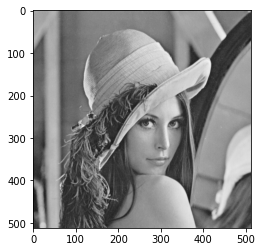

In [2]:
pgm_path = '../assets/pgms/lena.ascii.pgm'
pgm = libpgm.read(pgm_path)
libpgm.show(pgm)

## Threesholding

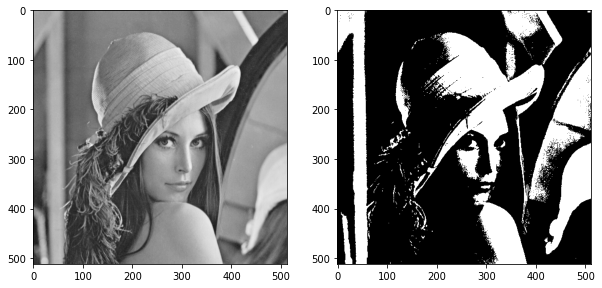

In [3]:
pgm = libpgm.read(pgm_path)
plt.figure(figsize=(10, 10), dpi=72)
plt.subplot(1, 2, 1)
libpgm.show(pgm)        
plt.subplot(1, 2, 2)

libpoint.threshold(pgm[0], 150)
libpgm.show(pgm)

## Contrast Stretching

[Source 1](https://homepages.inf.ed.ac.uk/rbf/HIPR2/stretch.htm) - [Source 2](https://theailearner.com/2019/01/30/contrast-stretching/) 

In [4]:
pgm = libpgm.read(pgm_path)
original_histogram, original_intensity = libpgm.calculate_histogram(pgm);

# 1 - Standard
pgm1 = libpgm.read(pgm_path)
libpoint.contrast_stretch(pgm1[0], 0, 255)

# 2 - Tailcut + Truncate
pgm2 = libpgm.read(pgm_path)
libpoint.contrast_stretch_tailcut(pgm2[0], original_histogram, 0.10, 0, 255)
libnorm.apply_threshold(pgm2[0], 0, 255)

#3 - Tailcut + MinMax
pgm3 = libpgm.read(pgm_path)
libpoint.contrast_stretch_tailcut(pgm3[0], original_histogram, 0.10, 0, 255)
libnorm.apply_minmax(pgm3[0], 0, 255)

#4 - Percentage + Truncate
pgm4 = libpgm.read(pgm_path)
libpoint.contrast_stretch_percentage(pgm4[0], original_intensity, 0.10, 0, 255)
libnorm.apply_threshold(pgm4[0], 0, 255)

#5 - Percentage + MinMax
pgm5 = libpgm.read(pgm_path)
libpoint.contrast_stretch_percentage(pgm5[0], original_intensity, 0.10, 0, 255)
libnorm.apply_minmax(pgm5[0], 0, 255);

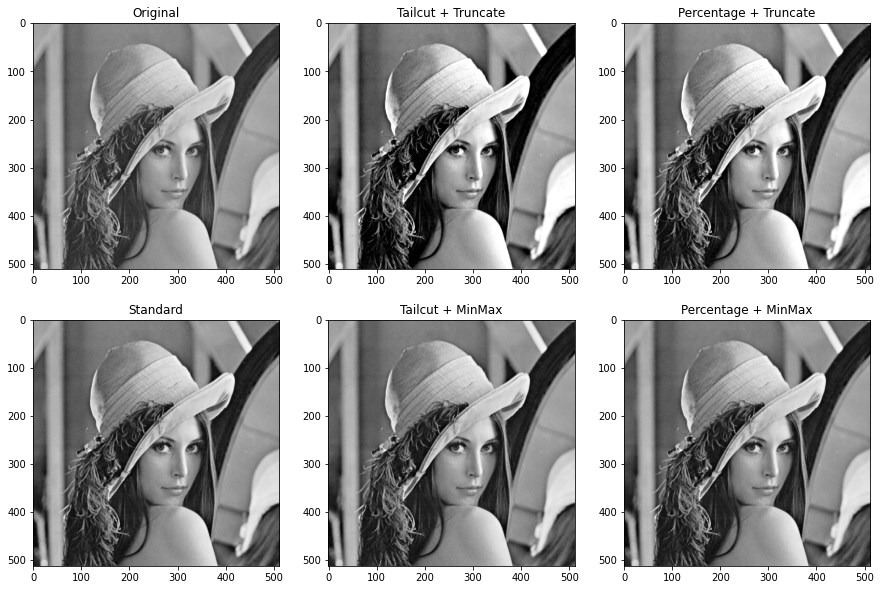

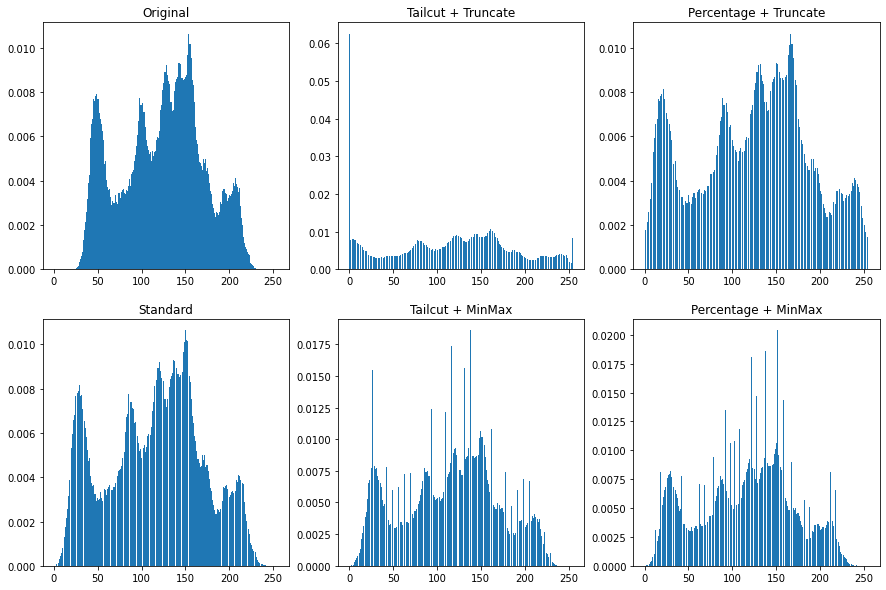

In [5]:
# Show Images
plt.figure(figsize=(15, 10), dpi=72)

plt.subplot(2, 3, 1)
plt.gca().set_title('Original')
libpgm.show(pgm)

plt.subplot(2, 3, 4)
plt.gca().set_title('Standard')
libpgm.show(pgm1)

plt.subplot(2, 3, 2)
plt.gca().set_title('Tailcut + Truncate')
libpgm.show(pgm2)

plt.subplot(2, 3, 5)
plt.gca().set_title('Tailcut + MinMax')
libpgm.show(pgm3)

plt.subplot(2, 3, 3)
plt.gca().set_title('Percentage + Truncate')
libpgm.show(pgm4)

plt.subplot(2, 3, 6)
plt.gca().set_title('Percentage + MinMax')
libpgm.show(pgm5)

# Show Histograms
_, intensity1 = libpgm.calculate_histogram(pgm1);
_, intensity2 = libpgm.calculate_histogram(pgm2);
_, intensity3 = libpgm.calculate_histogram(pgm3);
_, intensity4 = libpgm.calculate_histogram(pgm4);
_, intensity5 = libpgm.calculate_histogram(pgm5);

plt.figure(figsize=(15, 10), dpi=72)

plt.subplot(2, 3, 1)
plt.gca().set_title('Original')
plt.hist(range(256), 256, weights=original_intensity);

plt.subplot(2, 3, 4)
plt.gca().set_title('Standard')
plt.hist(range(256), 256, weights=intensity1);

plt.subplot(2, 3, 2)
plt.gca().set_title('Tailcut + Truncate')
plt.hist(range(256), 256, weights=intensity2);

plt.subplot(2, 3, 5)
plt.gca().set_title('Tailcut + MinMax')
plt.hist(range(256), 256, weights=intensity3);

plt.subplot(2, 3, 3)
plt.gca().set_title('Percentage + Truncate')
plt.hist(range(256), 256, weights=intensity4);

plt.subplot(2, 3, 6)
plt.gca().set_title('Percentage + MinMax')
plt.hist(range(256), 256, weights=intensity5);